**Понимание свертки**

In [203]:
import numpy as np
s1_0 = [1, 2, 3, 4, 5]
s2_0 = [10, 7, 5, 3, 7, 8] 
h = np.zeros(len(s1_0)+len(s2_0)-1)

s1 = np.zeros(len(h))
s1 [0:len(s1_0)] = s1_0

s2 = np.zeros(len(h))
s2[0:len(s2_0)] = s2_0

is2 = np.array(s2[::-1])

for i in range(0, len(h)):
  s2_i = s2[0:i+1]
  print(s1[0:i+1])
  print('   *   ')
  print(s2_i[::-1])
  print('============')

  h[i] = sum(s1[0:i+1] *s2_i[::-1])
 
print(h)

[1.]
   *   
[10.]
[1. 2.]
   *   
[ 7. 10.]
[1. 2. 3.]
   *   
[ 5.  7. 10.]
[1. 2. 3. 4.]
   *   
[ 3.  5.  7. 10.]
[1. 2. 3. 4. 5.]
   *   
[ 7.  3.  5.  7. 10.]
[1. 2. 3. 4. 5. 0.]
   *   
[ 8.  7.  3.  5.  7. 10.]
[1. 2. 3. 4. 5. 0. 0.]
   *   
[ 0.  8.  7.  3.  5.  7. 10.]
[1. 2. 3. 4. 5. 0. 0. 0.]
   *   
[ 0.  0.  8.  7.  3.  5.  7. 10.]
[1. 2. 3. 4. 5. 0. 0. 0. 0.]
   *   
[ 0.  0.  0.  8.  7.  3.  5.  7. 10.]
[1. 2. 3. 4. 5. 0. 0. 0. 0. 0.]
   *   
[ 0.  0.  0.  0.  8.  7.  3.  5.  7. 10.]
[ 10.  27.  49.  74. 106.  86.  74.  67.  67.  40.]


In [204]:
def sgnl_conv(s1_0, s2_0, corl=False):
  h = np.zeros(len(s1_0)+len(s2_0)-1)

  s1 = np.zeros(len(h))
  s1 [0:len(s1_0)] = s1_0

  s2 = np.zeros(len(h))
  s2[0:len(s2_0)] = s2_0


  is2 = np.array(s2[::-1])


  for i in range(0, len(h)):
    s2_i = s2[0:i+1]
    if corl==False:
      h[i] = sum(s1[0:i+1] *s2_i[::-1]) 
    else:
      h[i] = sum(s1[0:i+1] *s2_i) 
  return h


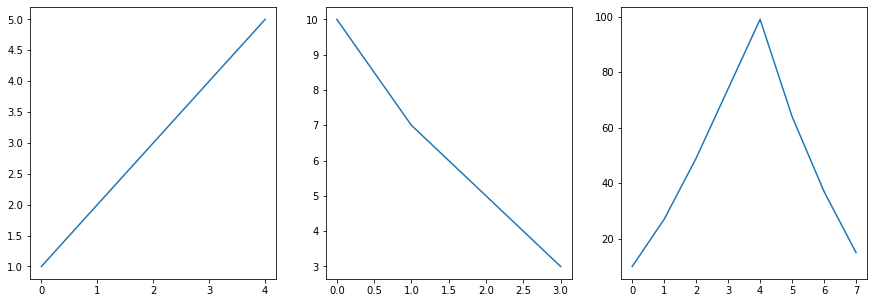

In [141]:
h = sgnl_conv(s1_0, s2_0, corl=False)

plt.figure(figsize=[15, 5])
plt.subplot(1,3,1)
plt.plot(s1_0)
plt.subplot(1,3,2)
plt.plot(s2_0)
plt.subplot(1,3,3)
plt.plot(h)

**СВЕРТКА**

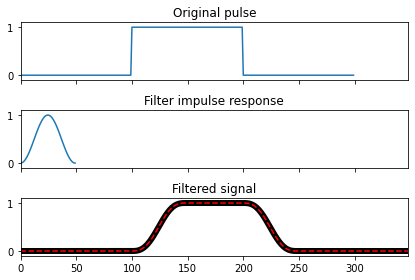

In [154]:
from scipy.signal import  convolve
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)

filtered_0 = sgnl_conv(sig, win) / sum(win)
filtered_1 = convolve(sig, win) / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered_0, 'k', linewidth = 6)
ax_filt.plot(filtered_1, '--r')
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

**Недостаток ФП при анализе нестационарных сигналов**

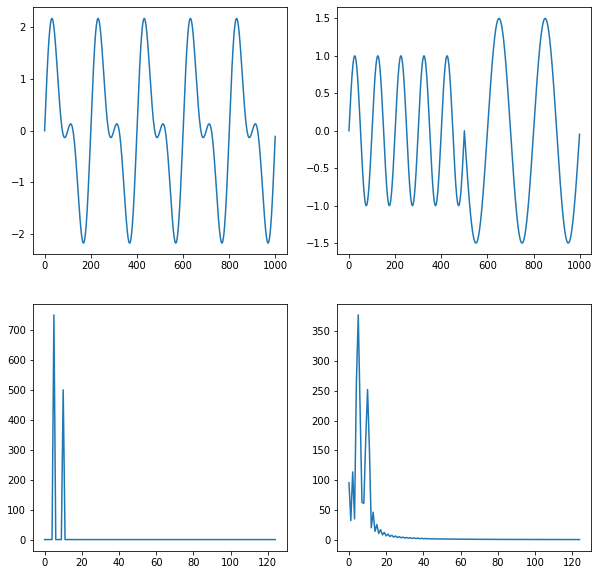

In [86]:
t = np.arange(0,1,0.001)
f1, f2 = 10, 5
s1 = np.sin(2*np.pi*t*f1) + 1.5*np.sin(2*np.pi*t*f2) 
s2 = np.empty(len(t))

for i in range(len(t)):
  if i <= len(t)/2:
    s2[i] = np.sin(2*np.pi*t[i]*f1)
  else:
    s2[i] = 1.5*np.sin(2*np.pi*t[i]*f2) 

plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.plot(s1)
plt.subplot(2,2,3)
plt.plot(abs(np.fft.fft(s1))[0:int(len(t)/8)])
plt.subplot(2,2,2)
plt.plot(s2)
plt.subplot(2,2,4)
plt.plot(abs(np.fft.fft(s2))[0:int(len(t)/8)])

**ОКОННЫЕ ФУНКЦИИ**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


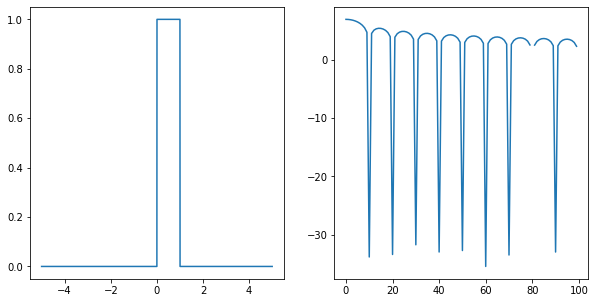

In [137]:
# прямоугольное окно
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline


t = np.arange(-5,5,0.001)
rect = []
for i in t:
  if i >=0 and i<=1 :
    rect.append (1)
  else:
    rect.append (0)
  
w_spect_cmplx = np.fft.fft(rect)
w_spect_ampl = abs(w_spect_cmplx)

plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.plot(t,rect)

plt.subplot(1,2,2)
plt.plot(log(w_spect_cmplx[0:100]))


**треугольное окно **

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


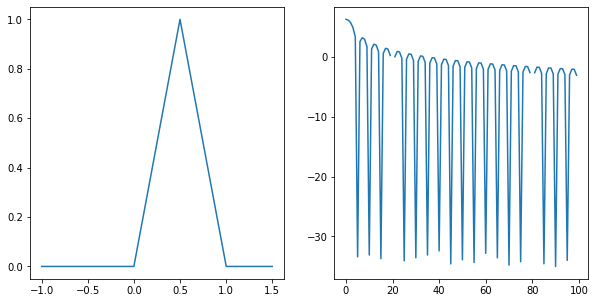

In [138]:
# треугольное окно 

t = np.arange(-1,1.5,0.001)
trngl = []
for i in t:
  if i >=0 and i<=1 :
    trngl.append (1 - abs(1-2*i))
  else:
   trngl.append (0)
  
w_spect_cmplx = np.fft.fft(trngl)
w_spect_ampl = abs(w_spect_cmplx)

plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.plot(t,trngl)

plt.subplot(1,2,2)
plt.plot(log(w_spect_cmplx[0:100]))


## **Oкно Ханна**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


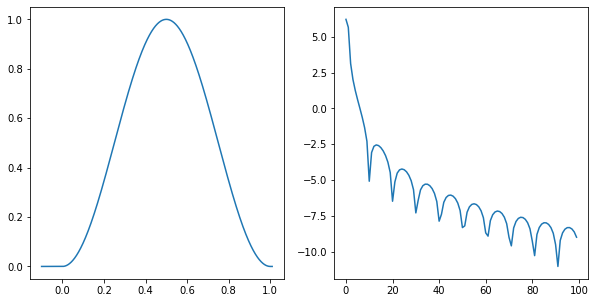

In [139]:
# – окно Ханна
t = np.arange(-0.1,1.01,0.001)
khan = []
for i in t:
  if i >=0 and i<=1 :
    khan.append (np.sin(np.pi*i)**2)
  else:
    khan.append (0)
  
w_spect_cmplx = np.fft.fft(khan)
w_spect_ampl = abs(w_spect_cmplx)

plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.plot(t,khan)

plt.subplot(1,2,2)
plt.plot(np.log(w_spect_cmplx[0:100]))


# **Oкно** **Хемминга**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


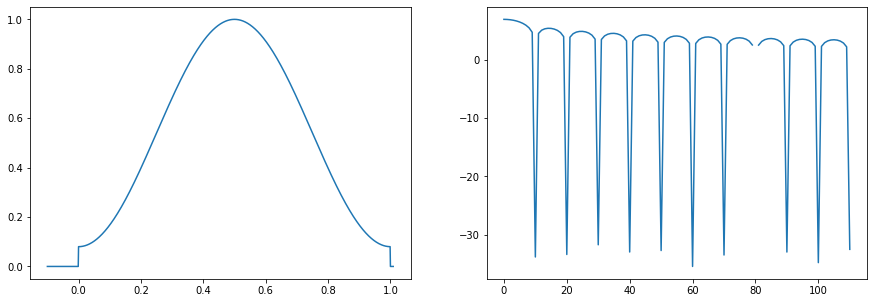

In [134]:
# окно Хемминга
t = np.arange(-0.1,1.01,0.001)
hamm = []
for i in t:
  if i >=0 and i<=1 :
    hamm.append (0.54-0.46*np.cos(2*i*np.pi))
  else:
    hamm.append (0)
  
w_spect_cmplx = np.fft.fft(w)
w_spect_ampl = abs(w_spect_cmplx)

plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.plot(t,hamm)

plt.subplot(1,2,2)
plt.plot(np.log(w_spect_ampl[0:int(len(t)/10)]))

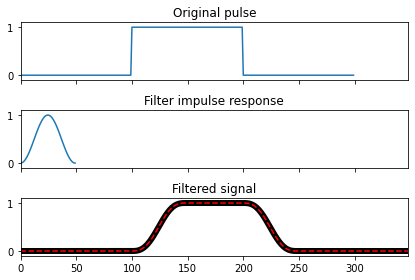

In [158]:
from scipy.signal import  convolve
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)

filtered_0 = sgnl_conv(sig, win) / sum(win)
filtered_1 = convolve(sig, win) / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered_0, 'k', linewidth = 6)
ax_filt.plot(filtered_1, '--r')
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

**Оконное преобазование Фурье**

(501, 21) (21,) (501,)


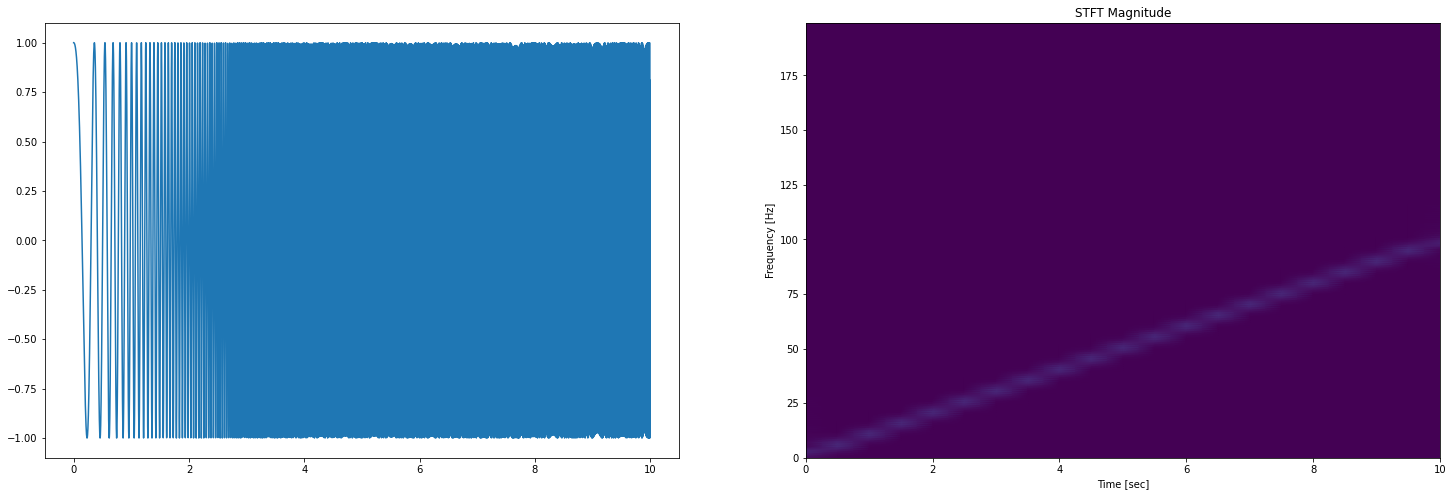

In [202]:
from scipy import signal
from scipy.signal import chirp
import matplotlib.pyplot as plt

fs = 1000
T = 10
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=1, f1=100, t1=T, method='linear')

plt.figure(figsize = [25, 8])
plt.subplot(1,2,1)
plt.plot(t,w )

f, t, Zxx = signal.stft(w, fs, nperseg=1000)
print(Zxx.shape, t.shape, f.shape)
plt.subplot(1,2,2)
plt.pcolormesh(t, f[0:200], np.abs(Zxx)[0:200], vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

